# Dataset Analysis

### Data and library Loading

In [22]:
# import libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px 

In [23]:
folder_path = "/home/amandine/Documents/Fullstacj/Projects/Final_Project/archive/"
common_prefix = "P003.MArumugam.Data."
data_folder_path = "/home/amandine/Documents/Fullstacj/Projects/Final_Project/archive/JEDHA_Certification_Microbiota/data/"
shape_table = pd.DataFrame(columns=['Original_File', 'New_File', 'Count_Species', 'Count_Samples'])
original_file_list = []
new_file_list = []
count_Species = []
Count_samples = []
dataframes = []
# Create a directory if it doesn't exist
if not os.path.exists(data_folder_path):
    os.makedirs(data_folder_path)

for file in os.listdir(folder_path):
    if file.endswith(".tsv") and file.startswith(common_prefix):
        original_file = os.path.join(folder_path, file)
        new_file_name = file.replace(common_prefix, "")
        new_file = os.path.join(data_folder_path, new_file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(original_file, sep="\t")
        original_file_list.append(file)
        new_file_list.append(new_file_name)
        count_Species.append(df.shape[1])
        Count_samples.append(df.shape[0])
        # Save the DataFrame to the new file
        df.to_csv(new_file, sep="\t", index=False)
        dataframes.append(df)
shape_table['Original_File'] = original_file_list
shape_table['New_File']=new_file_list
shape_table['Count_Species']=count_Species
shape_table['Count_Samples']=Count_samples
shape_table = shape_table.sort_values(by='Count_Samples')

print("\n \n Table of dataframe shapes : \n \n", shape_table)




 
 Table of dataframe shapes : 
 
                               Original_File              New_File  \
2    P003.MArumugam.Data.IT-CRC_species.tsv    IT-CRC_species.tsv   
1  P003.MArumugam.Data.IT-CRC-2_species.tsv  IT-CRC-2_species.tsv   
7    P003.MArumugam.Data.JP-CRC_species.tsv    JP-CRC_species.tsv   
4    P003.MArumugam.Data.US-CRC_species.tsv    US-CRC_species.tsv   
5    P003.MArumugam.Data.AT-CRC_species.tsv    AT-CRC_species.tsv   
6    P003.MArumugam.Data.FR-CRC_species.tsv    FR-CRC_species.tsv   
3    P003.MArumugam.Data.DE-CRC_species.tsv    DE-CRC_species.tsv   
0    P003.MArumugam.Data.CN-CRC_species.tsv    CN-CRC_species.tsv   

   Count_Species  Count_Samples  
2            850             53  
1            850             60  
7            850             80  
4            850            104  
5            850            109  
6            850            114  
3            850            120  
0            850            128  


There are more features than samples in all tsv files. 

Below a quick recap to know country acronyms
CN= Chinese have the more samples in dataset unsurprisingly ^^
DE = German is the second larger dataset in term of samples
then FRance
Then AT = Austrian 


In [24]:
# check missing values

for df in dataframes:
    print()
    print(any(df.isna().sum()))
    


False

False

False

False

False

False

False

False


## EDA on AT and CN datasets

In [25]:
AT_df = pd.read_csv("./data/AT-CRC_species.tsv", sep="\t")
CN_df = pd.read_csv("./data/CN-CRC_species.tsv", sep="\t")



filename_list = ["AT-CRC_species.tsv", "CN-CRC_species.tsv"]
df_list = [AT_df, CN_df]

AT_df.head()

condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
0   control                                      0.000000   
1   control                                      0.000591   
2   control                                      0.000840   
3   control                                      0.000000   
4   control                                      0.000085   

   Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
0                                     0.000000   
1                                     0.000066   
2                                     0.000065   
3                                     0.000071   
4                                     0.019236   

   Citrobacter_sp.___ref_mOTU_v2_0076__  \
0                              0.000000   
1                              0.000000   
2                              0.002454   
3                              0.000000   
4                              0.001111   

   Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
0                                           0.000000       
1                                           0.000000       
2                                           0.000000       
3                                           0.000000       
4                                           0.000256       

   Enterococcus_faecalis___ref_mOTU_v2_0116__  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000065   
3                                    0.000000   
4                                    0.000085   

   Lactobacillus_salivarius___ref_mOTU_v2_0125__  \
0                                       0.000000   
1                                       0.000000   
2                                       0.013111   
3                                       0.000000   
4                                       0.000085   

   Dielma_fastidiosa___ref_mOTU_v2_0138__  \
0                                0.000083   
1                                0.000000   
2                                0.000000   
3                                0.000213   
4                                0.000000   

   Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__  \
0                                           0.000000             
1                                           0.000066             
2                                           0.000065             
3                                           0.000071             
4                                           0.000000             

   Streptococcus_parasanguinis___ref_mOTU_v2_0144__  ...  \
0                                          0.000249  ...   
1                                          0.002102  ...   
2                                          0.012013  ...   
3                                          0.000142  ...   
4                                          0.000513  ...   

   unknown_Porphyromonas___meta_mOTU_v2_7777__  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   unknown_Clostridiales___meta_mOTU_v2_7778__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000171   

   unknown_Clostridiales___meta_mOTU_v2_7781__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000194   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7782__  \
0                                     0.000000   
1                                     0.000788   
2                       

In [26]:
import re

def list_specie(df):
    pattern = re.compile(r'___ref_mOTU_v2_\d+__')
    species_list = []
    for column in df.columns:
        species_list.append(column)
    species_list = species_list[1:]
    species_list = [re.sub(pattern, '', element) for element in species_list]
    return species_list


AT_species_list = list_specie(AT_df)
CN_species_list = list_specie(CN_df)


print(AT_species_list)
print(CN_species_list)

are_equal = AT_species_list == CN_species_list

if are_equal:
    print("The two lists are exactly the same.")
else:
    print("The two lists are not exactly the same.")

['Streptococcus_anginosus', 'Enterobacteriaceae_sp.', 'Citrobacter_sp.', 'Klebsiella_michiganensis/oxytoca', 'Enterococcus_faecalis', 'Lactobacillus_salivarius', 'Dielma_fastidiosa', 'Streptococcus_constellatus/intermedius', 'Streptococcus_parasanguinis', 'Streptococcus_sp._HSISM1', 'Peptostreptococcus_anaerobius', 'Bifidobacterium_longum', 'Bifidobacterium_breve', 'Klebsiella_sp.', 'Lactobacillus_ruminis', 'Lactococcus_lactis', 'Streptococcus_vestibularis', 'Streptococcus_salivarius', 'Streptococcus_thermophilus', 'Lactobacillus_casei/paracasei', 'Megasphaera_elsdenii', 'Streptococcus_sp.', 'Enterobacter_sp.', 'Bacteroides_stercoris', 'Prevotella_nigrescens', 'Streptococcus_sanguinis', 'Ruminococcus_gnavus', 'Ruminococcus_lactaris', 'Bacteroides_fragilis', 'Bacteroides_fragilis', 'Streptococcus_mutans', 'Bacteroides_nordii', 'Coprococcus_sp.', 'Streptococcus_anginosus', 'Streptococcus_oralis', 'Haemophilus_parainfluenzae', 'Lactococcus_lactis', 'Enterococcus_faecium', 'Acidaminococcus

In [27]:
taxonomy_similarity_count_table = pd.DataFrame(columns=["specie"])
taxonomy_similarity_count_table['specie'] = AT_species_list

species_taxonomy_count = taxonomy_similarity_count_table.value_counts()
# Filter out values with count = 1
filtered_counts = species_taxonomy_count[species_taxonomy_count > 1]

print(filtered_counts)
print(filtered_counts.shape)


specie                      
Faecalibacterium_prausnitzii    4
Streptococcus_anginosus         3
Phascolarctobacterium_sp.       2
Lactococcus_lactis              2
Parvimonas_sp.                  2
Blautia_obeum                   2
Dorea_longicatena               2
Blautia_producta                2
Erysipelotrichaceae_sp.         2
Bacteroides_fragilis            2
Clostridium_clostridioforme     2
Methanobrevibacter_smithii      2
Sutterella_wadsworthensis       2
Porphyromonas_uenonis           2
Streptococcus_salivarius        2
Ruminococcus_torques            2
Streptococcus_sp.               2
Name: count, dtype: int64
(17,)


There are only 17 taxonomies that appears to have common prefix so it would not be relevant to merge them together.

### Summary statistics
To have an idea of the distribution of the conditions

To have an idea of the distribution and variability of the abundances of the species 

In [28]:
count_conditions_AT = AT_df['condition'].value_counts()
print(count_conditions_AT)

count_conditions_CN = CN_df['condition'].value_counts()
print(count_conditions_CN)

condition
control    63
CRC        46
Name: count, dtype: int64
condition
CRC        74
control    54
Name: count, dtype: int64


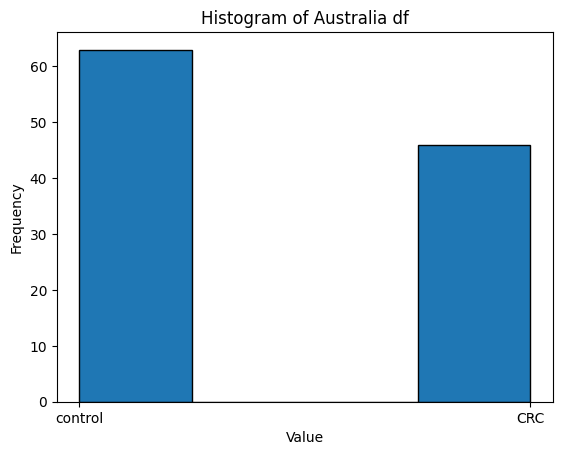

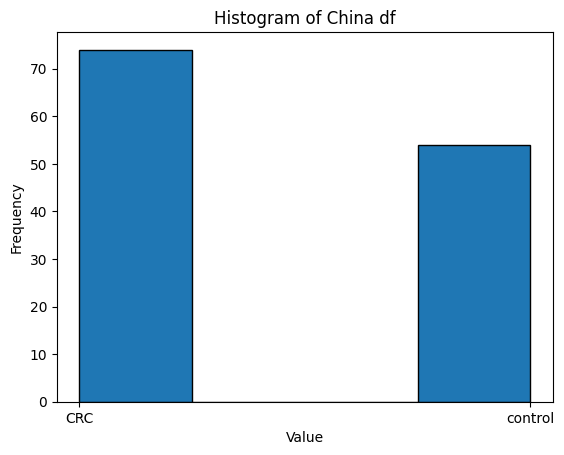

In [29]:
# Conditions distributions

# Plot histograms of condition column for both dataset
plt.hist(AT_df['condition'], bins=4, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Australia df')
plt.show()

plt.hist(CN_df['condition'], bins=4, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of China df')
plt.show()


In [30]:
def describe_data(df, country):
    print("\n Summary statistics for {} dataset  \n".format(country))
    print(df.describe(include="all"))

describe_data(AT_df,"Australia")
describe_data(CN_df,"China")


 Summary statistics for Australia dataset  

       condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
count        109                                    109.000000   
unique         2                                           NaN   
top      control                                           NaN   
freq          63                                           NaN   
mean         NaN                                      0.000073   
std          NaN                                      0.000155   
min          NaN                                      0.000000   
25%          NaN                                      0.000000   
50%          NaN                                      0.000000   
75%          NaN                                      0.000079   
max          NaN                                      0.001027   

        Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
count                                    109.000000   
unique                                          NaN

### Correlation between species

In [31]:
# # Select only the species columns excluding the first condition column
# species_data = AT_df.iloc[:, 1:]

# # Calculate Pearson correlation matrix
# correlation_matrix = species_data.corr(method='pearson')

# # Create a correlation heatmap using seaborn
# plt.figure(figsize=(12, 10)) 
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Pearson Correlation Heatmap of Species')
# plt.show()


### PCA

In [32]:
X = np.array(AT_df.iloc[:, 1:])
print(X[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  8.30082178e-05 8.30082178e-05]
 [5.91094181e-04 6.56771312e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.39630563e-04 6.45869664e-05 2.45430472e-03 ... 0.00000000e+00
  1.80843506e-03 0.00000000e+00]
 [0.00000000e+00 7.08666997e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.54920065e-05 1.92357015e-02 1.11139608e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(5)
PC = pca.fit_transform(X)
PC = pd.DataFrame(data=PC, columns=["PC1", "PC2", "PC3","PC4","PC5"])
PC.shape

(109, 5)

In [34]:
# Create scatterplot 
fig = px.scatter(data_frame=PC, x="PC1", y="PC2")

# Show scatterplot 
fig.show(renderer="notebook")


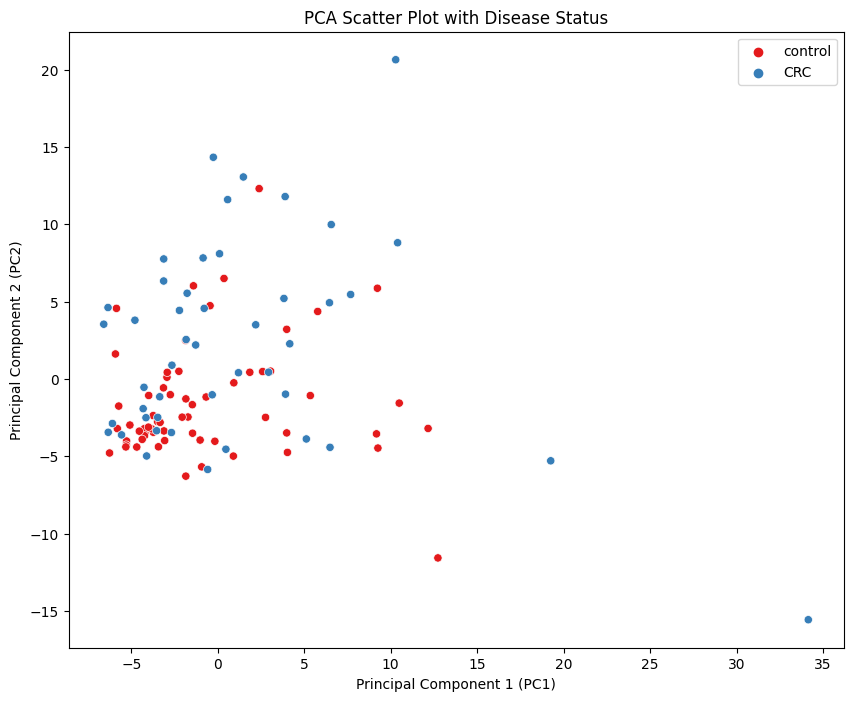

In [35]:
disease_status = AT_df['condition']

# Combine PCA data with disease status
pca_with_status = pd.concat([PC, disease_status], axis=1)

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.scatterplot(x='PC1', y='PC2', data=pca_with_status, hue='condition', palette='Set1')
plt.title('PCA Scatter Plot with Disease Status')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


### Features representation

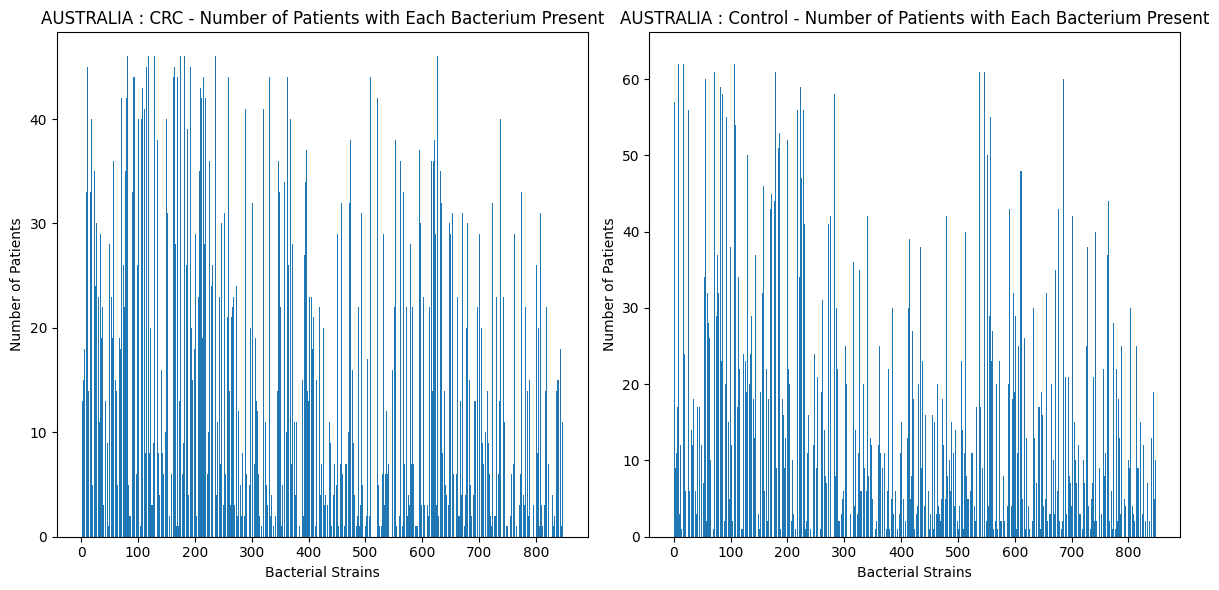

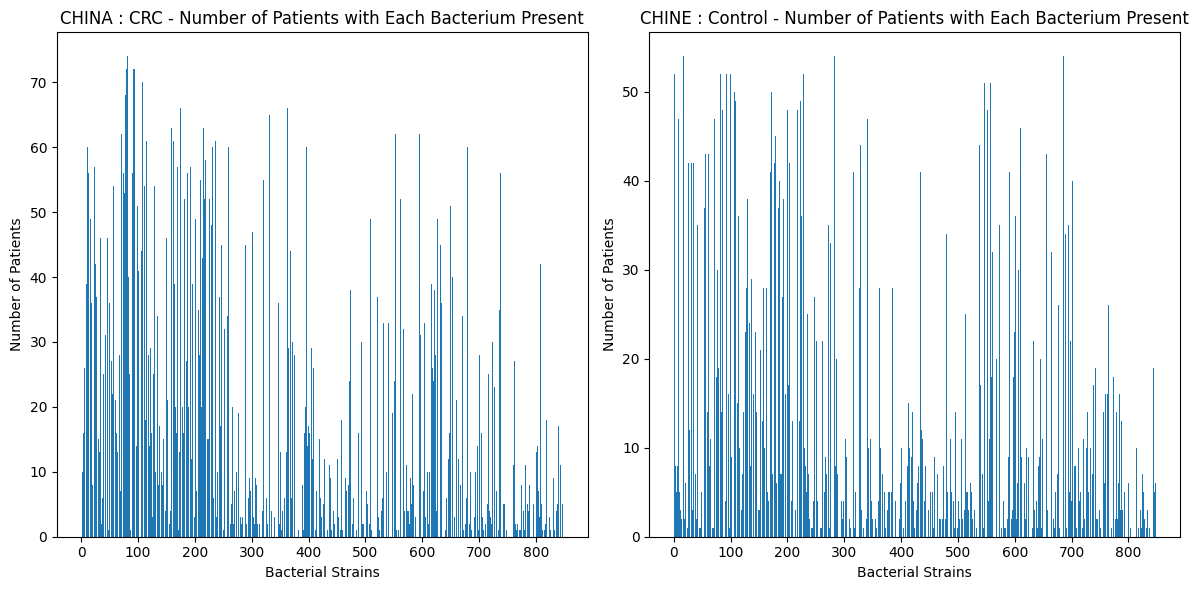

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your abundance matrix (replace this with your actual data)
# AT_df = pd.read_csv('your_abundance_matrix.csv')

# Assuming the first column contains the condition (control or CRC)
# and the following columns contain bacterial strains
bacterial_columns = AT_df.columns[1:]

# Separate the data for CRC and control
crc_data = AT_df[AT_df['condition'] == 'CRC']
control_data = AT_df[AT_df['condition'] == 'control']

# Calculate presence counts for each group
crc_presence_counts = (crc_data[bacterial_columns] > 0).sum()
control_presence_counts = (control_data[bacterial_columns] > 0).sum()

# Create subplots for CRC and control histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for CRC
axes[0].bar(range(len(bacterial_columns)), crc_presence_counts)
axes[0].set_title('AUSTRALIA : CRC - Number of Patients with Each Bacterium Present')
axes[0].set_xlabel('Bacterial Strains')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xticks(range(0, len(bacterial_columns), 100))  # Set ticks every 100 indices
axes[0].set_xticklabels(range(0, len(bacterial_columns), 100))
axes[0].tick_params(axis='x', rotation=0)

# Plot histogram for control
axes[1].bar(range(len(bacterial_columns)), control_presence_counts)
axes[1].set_title('AUSTRALIA : Control - Number of Patients with Each Bacterium Present')
axes[1].set_xlabel('Bacterial Strains')
axes[1].set_ylabel('Number of Patients')
axes[1].set_xticks(range(0, len(bacterial_columns), 100))  # Set ticks every 100 indices
axes[1].set_xticklabels(range(0, len(bacterial_columns), 100))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load your abundance matrix (replace this with your actual data)
# AT_df = pd.read_csv('your_abundance_matrix.csv')

# Assuming the first column contains the condition (control or CRC)
# and the following columns contain bacterial strains
bacterial_columns = CN_df.columns[1:]

# Separate the data for CRC and control
crc_data = CN_df[CN_df['condition'] == 'CRC']
control_data = CN_df[CN_df['condition'] == 'control']

# Calculate presence counts for each group
crc_presence_counts = (crc_data[bacterial_columns] > 0).sum()
control_presence_counts = (control_data[bacterial_columns] > 0).sum()

# Create subplots for CRC and control histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for CRC
axes[0].bar(range(len(bacterial_columns)), crc_presence_counts)
axes[0].set_title('CHINA : CRC - Number of Patients with Each Bacterium Present')
axes[0].set_xlabel('Bacterial Strains')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xticks(range(0, len(bacterial_columns), 100))  # Set ticks every 100 indices
axes[0].set_xticklabels(range(0, len(bacterial_columns), 100))
axes[0].tick_params(axis='x', rotation=0)

# Plot histogram for control
axes[1].bar(range(len(bacterial_columns)), control_presence_counts)
axes[1].set_title('CHINE : Control - Number of Patients with Each Bacterium Present')
axes[1].set_xlabel('Bacterial Strains')
axes[1].set_ylabel('Number of Patients')
axes[1].set_xticks(range(0, len(bacterial_columns), 100))  # Set ticks every 100 indices
axes[1].set_xticklabels(range(0, len(bacterial_columns), 100))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()



We can already vizualise differences between countries, let's check if this can be visualized trhough PCA 

In [39]:
combined_df = pd.read_csv("./data/Microbiota_composition.csv")
# drop the Unnamed column 
combined_df.drop(columns=['Unnamed: 0'], inplace=True)
combined_df.head()

condition  Streptococcus_anginosus___ref_mOTU_v2_0004__  \
0   control                                      0.000000   
1   control                                      0.000591   
2   control                                      0.000840   
3   control                                      0.000000   
4   control                                      0.000085   

   Enterobacteriaceae_sp.___ref_mOTU_v2_0036__  \
0                                     0.000000   
1                                     0.000066   
2                                     0.000065   
3                                     0.000071   
4                                     0.019236   

   Citrobacter_sp.___ref_mOTU_v2_0076__  \
0                              0.000000   
1                              0.000000   
2                              0.002454   
3                              0.000000   
4                              0.001111   

   Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__  \
0                                           0.000000       
1                                           0.000000       
2                                           0.000000       
3                                           0.000000       
4                                           0.000256       

   Enterococcus_faecalis___ref_mOTU_v2_0116__  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000065   
3                                    0.000000   
4                                    0.000085   

   Lactobacillus_salivarius___ref_mOTU_v2_0125__  \
0                                       0.000000   
1                                       0.000000   
2                                       0.013111   
3                                       0.000000   
4                                       0.000085   

   Dielma_fastidiosa___ref_mOTU_v2_0138__  \
0                                0.000083   
1                                0.000000   
2                                0.000000   
3                                0.000213   
4                                0.000000   

   Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__  \
0                                           0.000000             
1                                           0.000066             
2                                           0.000065             
3                                           0.000071             
4                                           0.000000             

   Streptococcus_parasanguinis___ref_mOTU_v2_0144__  ...  \
0                                          0.000249  ...   
1                                          0.002102  ...   
2                                          0.012013  ...   
3                                          0.000142  ...   
4                                          0.000513  ...   

   unknown_Porphyromonas___meta_mOTU_v2_7777__  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   unknown_Clostridiales___meta_mOTU_v2_7778__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000171   

   unknown_Clostridiales___meta_mOTU_v2_7781__  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000194   
3                                     0.000000   
4                                     0.000000   

   unknown_Clostridiales___meta_mOTU_v2_7782__  \
0                                     0.000000   
1                                     0.000788   
2                       

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your abundance matrix (replace this with your actual data)
# AT_df = pd.read_csv('your_abundance_matrix.csv')

# Assuming the first column contains the condition (control or CRC)
# and the following columns contain bacterial strains
bacterial_columns = combined_df.columns[1:]

# Define X (features) and y (target)
X = combined_df[bacterial_columns]
y = combined_df['condition']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set to store selected features
selected_features = set()

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Initialize the model
model = LogisticRegression()
results_df = pd.DataFrame(columns=['Selected_Features', 'Accuracy_Score'])

# Forward selection loop
for _ in range(len(bacterial_columns)):
    best_accuracy = 0
    best_feature = None
    
    # Iterate through bacterial_columns to find the best feature to add
    for feature in bacterial_columns:
        if feature not in selected_features:
            features_to_use = list(selected_features) + [feature]
            X_train_subset = X_train[features_to_use]
            X_test_subset = X_test[features_to_use]
            
            # Fit the model and calculate accuracy
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Update the best feature and accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    
    # Add the best feature to selected_features and update accuracy_scores
    selected_features.add(best_feature)
    accuracy_scores.append(best_accuracy)


results_df['Selected_Features'] = selected_features
results_df['Accuracy_Score'] = accuracy_scores
print(selected_features)
print(accuracy_scores)
# Save the results DataFrame to a CSV file
results_df.to_csv('forward_selection_results.csv', index=False)


In [ ]:
# Plot the accuracy scores

plt.plot(range(1, len(selected_features) + 1), accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Forward Selection Accuracy')
plt.xticks(range(1, len(selected_features) + 1))
plt.show()